# Newton's Backward Difference Interpolating Polynomials

Name : Mukesh Tiwari
Date : 03/04/2022

not completed

In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib notebook

In [42]:
#input data

xval = np.linspace(-5,5,20)

#yval = np.e**xval
yval = np.sin(xval) + 0.5 * np.cos(xval) +  0.7 * np.sin(2*xval) 

In [43]:
xval

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [44]:
yval

array([ 1.48157015,  0.53178695, -0.32432653, -0.57595522, -0.39747079,
       -0.35646753, -0.73595158, -1.18326799, -1.05784993, -0.12899017,
        1.09456349,  1.76206902,  1.43552003,  0.46795886, -0.35923167,
       -0.57221473, -0.38524931, -0.3682253 , -0.76823127, -1.19790796])

In [45]:
#defining constants

h = xval[1] - xval[0]   
n = len(yval)
h

0.5263157894736841

In [46]:
#Implementing backward differnce operator

def bdiff(y, n ,i):
    if n == 0:
        return y[i]
    
    return bdiff(y,n-1,i) - bdiff(y,n-1,i-1)

In [47]:
bdiff(yval,25,19)?

SyntaxError: invalid syntax (3817462256.py, line 1)

In [48]:
#implementing D

def d(x,i):
    ans = 1
    for j in range(0,i):
        ans = ans * (x - xval[j])
    return ans
    

In [49]:
d(0,3)

88.29639889196676

In [50]:
#Implementing p for a
def p(i):
    ans = 1
    for j in range(0,i):
        ans = ans * (p - j)
    return ans

In [51]:
def coeff(y):
    n = len(y)
    c = []
    for i in range(0,n):
        c.append(bdiff(y,i,n-1) / (math.factorial(i) * h**i))
    return c

In [52]:
def pol(coeff , x):
    val = 0
    for i in range(0,n):
        val = val + coeff[i] * d(x,i)
    return val

In [55]:
co = coeff(yval)
co

[-1.1979079595540842,
 -0.8163857145991703,
 -0.053555655344215684,
 0.4428161953239264,
 0.3445078247540245,
 0.06430564479140295,
 -0.02396632277942802,
 -0.01264106483989518,
 -0.0014561784903068184,
 0.0003370397247884398,
 0.00012382891646853865,
 1.0368383707975532e-05,
 -1.7654343679701923e-06,
 -5.024625723239307e-07,
 -3.3457263308415424e-08,
 4.441232085364642e-09,
 1.0402498295731443e-09,
 5.7855385717217955e-11,
 -6.223132176889925e-12,
 -1.2446141890045425e-12]

<IPython.core.display.Javascript object>


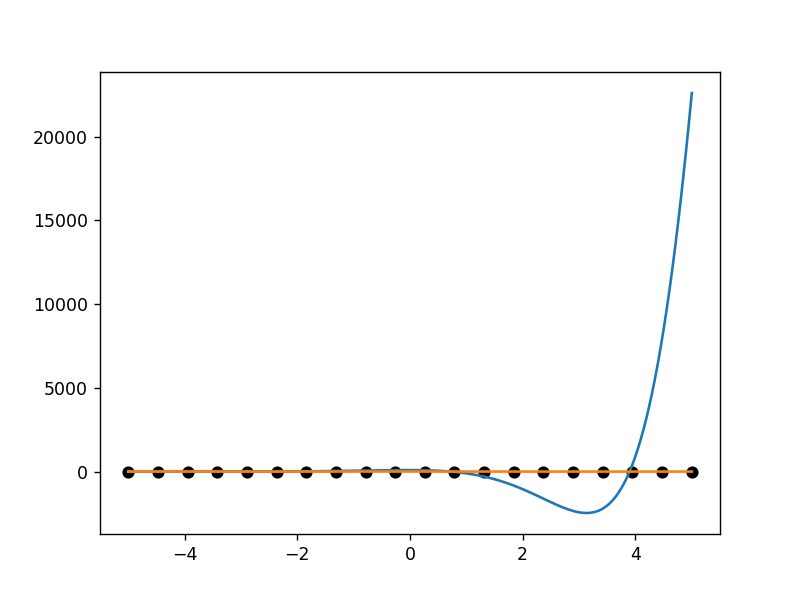

In [56]:
fval = [np.sin(i) + 0.5 * np.cos(i) +  0.7 * np.sin(2*i) for i in np.linspace(-5,5,200)]
pval = [pol(co , i) for i in np.linspace(-5,5,200)]
fig , ax = plt.subplots()
ax.plot(xval,yval , 'ko')
ax.plot(np.linspace(-5,5,200), pval)
ax.plot(np.linspace(-5,5,200) , fval)

fig.show()